## **GloVe**

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Visit https://nlp.stanford.edu/projects/glove/.

Then, under "Download pre-trained word vectors," you may select one of four alternatives for different training dataset sizes or sizes.

In [ ]:
embeddings_dict = {}
with open("/content/drive/MyDrive/glove.6B.200d.txt", 'r', encoding="utf-8") as f:
  for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

Now, if we wish to rank all words by their similarity to a specific term, like "king," we may use: We can slice at the end for the nearest, say, five words.

In [ ]:
find_closest_embeddings(embeddings_dict["king"])[:5]

['king', 'prince', 'queen', 'monarch', 'kingdom']

**Words and Math**

Now that we can convert every word into a vector, we can apply any arithmetic operation used to vectors.
For instance, much like numbers, we can add and subtract two words together. Specifically, twig-branch+hand finger.

In [ ]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['twig', 'hand', 'cupping', 'paddles', 'caressing']


**Graphing the Vectors**

Nothing aids in the discovery of insights in data more than visualisation.
To display the vectors, we will first employ a technique known as t-distributed stochastic neighbour embedding, abbreviated as t-SNE. t-SNE will allow us to decrease the data's 50 dimensions to just two in my instance. After that, it's as simple as plotting it with a matplotlib scatter plot.

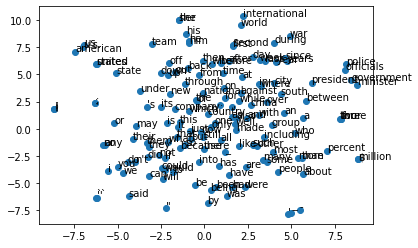

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:150])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

## **Doc2Vec**

The Doc2Vec model is used to generate a vectorized representation of a collection of words considered as a whole. Documents, however, do not have logical structures like words. Therefore another technique was developed.

The idea is simple but clever: in addition to the word2vec model, there is now another vector (Document ID).

In [ ]:
import gensim
import gensim.downloader as api
dataset = api.load("text8")
data = [d for d in dataset]

[==================================================] 100.0% 31.6/31.6MB downloaded


We need a tagged document to train the model, which can be generated by calling models.doc2vec.TaggedDcument() as seen below:

Each document has a single tag, which serves as a unique identifier for that specific document. After training, the tags are used to look up the learned vectors. The tags are just keys in the doc-vectors set; they have no semantic value. If a string is repeated from the word-tokens in the text, there is no essential relationship between this tag key and the word.

In [ ]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_for_training = list(tagged_document(data))

In [ ]:
print(data_for_training [:1])

[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers'

We now need to initialize the model once it has been trained. It is possible to do so as follows:

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

Next, construct the vocabulary as follows:

In [ ]:
model.build_vocab(data_for_training)

Let us now train the Doc2Vec model as follows:

In [ ]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))

[-0.14238876 -0.1976628  -0.39986464  0.27267072  0.05277463 -0.12429315
 -0.00729486 -0.08273323 -0.18777321  0.03803031  0.23573735 -0.12003139
 -0.23571698 -0.10049718 -0.08530986 -0.01728958  0.07428073  0.06752282
 -0.2863318  -0.2200705  -0.12938838  0.05161884 -0.03981753  0.07862238
 -0.03028823 -0.22114208 -0.15273663 -0.3109656   0.07074568 -0.08973138
  0.08298279  0.07559748 -0.24810146 -0.34319007 -0.339799    0.28497073
  0.01944237 -0.07592133 -0.00178928 -0.2531521 ]
